In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
tf.random.set_seed(2382)

2023-11-07 11:46:33.249569: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 11:46:33.255052: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 11:46:33.335950: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 11:46:33.336003: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 11:46:33.336039: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# 0. Load the data

In [2]:
(Xtrain, ytrain),(Xtest, ytest) = mnist.load_data()

# 1. Image normalization, output encoding

In [3]:
Xtrain_norm = Xtrain / 255.0
Xtest_norm = Xtest / 255.0

ytrain_ohe = tf.keras.utils.to_categorical(ytrain)
ytest_ohe = tf.keras.utils.to_categorical(ytest)

# 2. Neural network model

In [4]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation="softmax") ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Train the model

In [6]:
history = model.fit(Xtrain, ytrain_ohe, 
                batch_size=128, 
                epochs=4, 
                validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 16s 40ms/step - loss: 1.0510 - accuracy: 0.8963 - val_loss: 0.1378 - val_accuracy: 0.9653
Epoch 2/5
375/375 [==============================] - 16s 42ms/step - loss: 0.1037 - accuracy: 0.9710 - val_loss: 0.1032 - val_accuracy: 0.9737
Epoch 3/5
375/375 [==============================] - 13s 35ms/step - loss: 0.0635 - accuracy: 0.9809 - val_loss: 0.0898 - val_accuracy: 0.9763
Epoch 4/5
375/375 [==============================] - 13s 34ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0719 - val_accuracy: 0.9822
Epoch 5/5
375/375 [==============================] - 11s 30ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0864 - val_accuracy: 0.9785


### Evolution of the model during training

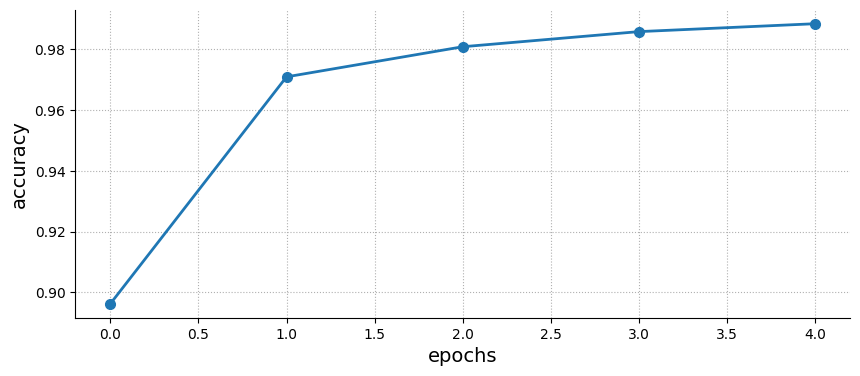

In [9]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(history.history['accuracy'],'.-',linewidth=2,markersize=14)
ax.grid(linestyle=':')
ax.set_xlabel('epochs',fontsize=14)
ax.set_ylabel('accuracy',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 4. Evaluate on the test data

In [10]:
model.evaluate(x=Xtest, y=ytest_ohe)

313/313 [==============================] - 2s 5ms/step - loss: 0.0728 - accuracy: 0.9792


[0.07280384004116058, 0.979200005531311]